In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

from pathlib import Path
from regression_utils import *

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

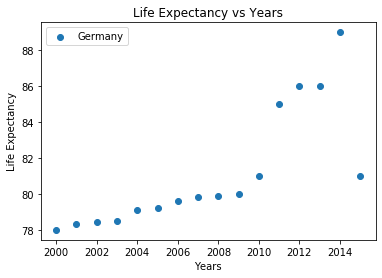

Train:Test split is:  14 : 2


In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

# Quantity variation of 3 countries (Germany, Netherlands, Spain)
# change here 
country = 'Germany'
countryDataFrame = countryDF(country, df)
countryQuantity = columnExtractor(countryDataFrame,'Life expectancy')
#print(countryQuantity)
    
years = columnExtractor(countryDataFrame,'Year')
#print(years)

percentage_expenditure = columnExtractor(countryDataFrame,'percentage expenditure')
#print(percentage_expenditure)

#plotQuantities(years, countryQuantity,'Years','Population', country,'Population vs Years')
plotQuantities(years, countryQuantity, 'Years', 'Life Expectancy', country, 'Life Expectancy vs Years')

split = np.random.randint(1,15)
countryQuantityTrain, yearsTrain, countryQuantityTest, yearsTest = randomizer(countryQuantity, years, split)


length scale is:  17


/home/mihir/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


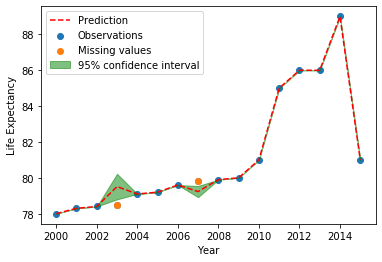

In [4]:
countryQuantityPredict, sigma = gaussianRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity) 

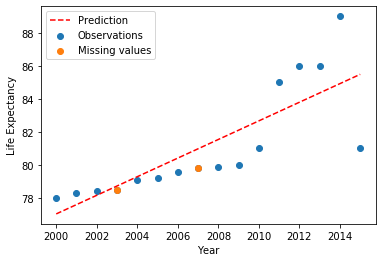

In [5]:
countryQuantityPredictLR = linearRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity)

GPR Prediction 
 [[78.         78.3        78.4        79.51205258 79.1        79.2
  79.6        79.23235801 79.9        80.         81.         85.
  86.         86.         89.         81.        ]]
Actual 
 [78.0, 78.3, 78.4, 78.5, 79.1, 79.2, 79.6, 79.8, 79.9, 80.0, 81.0, 85.0, 86.0, 86.0, 89.0, 81.0]
GPR error:  [[0.         0.         0.         1.28923896 0.         0.
  0.         0.71133081 0.         0.         0.         0.
  0.         0.         0.         0.        ]]
mean absolute percentage error GPR :  0.12503561071933267
------------------------------------------
LR Prediction 
 [[77.03192446 77.59604317 78.16016187 78.72428058 79.28839928 79.85251799
  80.41663669 80.9807554  81.5448741  82.10899281 82.67311151 83.23723022
  83.80134892 84.36546763 84.92958633 85.49370504]]
Actual 
 [78.0, 78.3, 78.4, 78.5, 79.1, 79.2, 79.6, 79.8, 79.9, 80.0, 81.0, 85.0, 86.0, 86.0, 89.0, 81.0]
LR error  [[1.24112249 0.89905087 0.30591598 0.28570774 0.23817861 0.82388635
  1.0259254

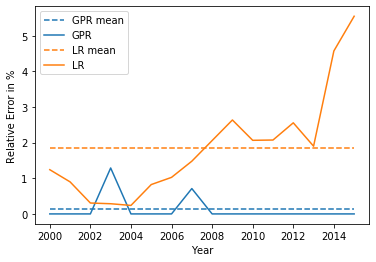

In [6]:
# error computation for GPR 
years = columnExtractor(countryDataFrame,'Year').tolist()
error = errorComputation(countryDataFrame, countryQuantityPredict, 'Life expectancy',regression_type='GPR')
print('GPR error: ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='GPR',color='#1f77b4')

print('------------------------------------------')

years = columnExtractor(countryDataFrame,'Year').tolist()
error = errorComputation(countryDataFrame, countryQuantityPredictLR, 'Life expectancy',regression_type='LR')
print('LR error ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='LR',color='#ff7f0e')

plt.show()


#go with rmse for outliers 
#try using normalization